# Shallow Neural Net in Pytorch

#### Load Dependencies

In [2]:
import torch
import torch.nn as nn

from torchvision.datasets import MNIST
from torchvision import transforms

from torchsummary import summary

import matplotlib.pyplot as plt

#### Load Data

In [3]:
train = MNIST('data', train = True, transform = transforms.ToTensor(), download = True)
test = MNIST('data', train = False, transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
train.data.shape

torch.Size([60000, 28, 28])

In [5]:
train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

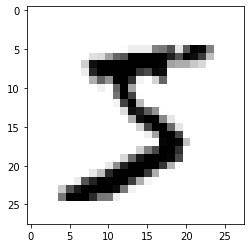

In [6]:
plt.imshow(train.data[0].numpy().squeeze(), cmap='gray_r')

In [7]:
train.targets[0:100]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])

In [8]:
train.targets.shape

torch.Size([60000])

In [9]:
test.data.shape

torch.Size([10000, 28, 28])

In [10]:
test.targets.shape

torch.Size([10000])

#### Batch Loader

In [15]:
train_loader = torch.utils.data.DataLoader(train, batch_size = 128, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = 128)

In [18]:
x_sample, y_sample = next(iter(train_loader))

In [19]:
x_sample.shape

torch.Size([128, 1, 28, 28])

In [20]:
y_sample.shape

torch.Size([128])

In [21]:
y_sample

tensor([3, 4, 1, 1, 1, 5, 2, 9, 8, 3, 8, 3, 9, 1, 7, 2, 7, 9, 7, 1, 2, 1, 3, 7,
        8, 7, 1, 8, 1, 1, 7, 8, 9, 9, 9, 6, 5, 7, 7, 2, 7, 4, 1, 7, 0, 1, 8, 6,
        0, 6, 0, 5, 7, 6, 5, 0, 2, 4, 2, 0, 4, 8, 6, 3, 9, 7, 1, 9, 6, 1, 3, 3,
        6, 3, 6, 5, 7, 1, 0, 1, 8, 1, 2, 4, 5, 6, 2, 3, 6, 9, 5, 1, 6, 7, 8, 7,
        1, 4, 1, 7, 5, 4, 4, 7, 6, 8, 4, 4, 1, 6, 2, 2, 5, 7, 9, 5, 1, 6, 3, 0,
        6, 6, 4, 3, 2, 2, 8, 9])

In [ ]:
x_sample[0]

In [23]:
x_flat_sample = x_sample.view(x_sample.shape[0], -1)

In [24]:
x_flat_sample.shape

torch.Size([128, 784])

In [ ]:
x_flat_sample[0]

#### Design Neural Network

In [26]:
n_input = 784
n_dense = 64
n_out = 10

In [27]:
model = nn.Sequential(
    nn.Linear(n_input, n_dense), #hidden layer
    nn.Sigmoid(), #activation function
    nn.Linear(n_dense, n_out)
)

In [28]:
summary(model, (1, n_input))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
           Sigmoid-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


#### Configure Training Hyperparameters

In [29]:
cost_fxn = nn.CrossEntropyLoss()

In [30]:
optimizer = torch.optim.SGD(model.parameters(), lr= 0.01)

In [31]:
def accuracy_pct(pred_y, true_y):
  _, prediction = torch.max(pred_y, 1) # returns maximum values, indices; fed tensor, dim to reduce
  correct = (prediction == true_y).sum().item()
  return (correct / true_y.shape[0]) * 100.0

In [32]:
n_batches = len(train_loader)
n_batches

469

In [33]:
n_epochs = 5 

print('Training for {} epochs. \n'.format(n_epochs))

for epoch in range(n_epochs):
  
  avg_cost = 0.0
  avg_accuracy = 0.0
  
  for i, (x, y) in enumerate(train_loader): # enumerate() provides count of iterations  
    
    # forward propagation:
    x_flat = x.view(x.shape[0], -1)
    y_hat = model(x_flat)
    cost = cost_fxn(y_hat, y)
    avg_cost += cost / n_batches
    
    # backprop and optimization via gradient descent: 
    optimizer.zero_grad() # set gradients to zero; .backward() accumulates them in buffers
    cost.backward()
    optimizer.step()
    
    # calculate accuracy metric:
    accuracy = accuracy_pct(y_hat, y)
    avg_accuracy += accuracy / n_batches
    
    if (i + 1) % 100 == 0:
      print('Step {}'.format(i + 1))
    
  print('Epoch {}/{} complete. Cost: {:.3f}, Accuracy: {:.1f}% \n'
        .format(epoch + 1, n_epochs, avg_cost, avg_accuracy)) 

print('Training complete.')

Training for 5 epochs. 

Step 100
Step 200
Step 300
Step 400
Epoch 1/5 complete. Cost: 2.232, Accuracy: 30.9% 

Step 100
Step 200
Step 300
Step 400
Epoch 2/5 complete. Cost: 2.056, Accuracy: 56.0% 

Step 100
Step 200
Step 300
Step 400
Epoch 3/5 complete. Cost: 1.796, Accuracy: 65.1% 

Step 100
Step 200
Step 300
Step 400
Epoch 4/5 complete. Cost: 1.505, Accuracy: 70.1% 

Step 100
Step 200
Step 300
Step 400
Epoch 5/5 complete. Cost: 1.256, Accuracy: 74.9% 

Training complete.


#### Test Model

In [34]:
n_test_batches = len(test_loader)
n_test_batches

79

In [35]:
model.eval() # disables dropout (and batch norm)

with torch.no_grad(): # disables autograd, reducing memory consumption
  
  avg_test_cost = 0.0
  avg_test_acc = 0.0
  
  for X, y in test_loader:
    
    # make predictions: 
    X_flat = X.view(X.shape[0], -1)
    y_hat = model(X_flat)
    
    # calculate cost: 
    cost = cost_fxn(y_hat, y)
    avg_test_cost += cost / n_test_batches
    
    # calculate accuracy:
    test_accuracy = accuracy_pct(y_hat, y)
    avg_test_acc += test_accuracy / n_test_batches

print('Test cost: {:.3f}, Test accuracy: {:.1f}%'.format(avg_test_cost, avg_test_acc))

# model.train() # 'undoes' model.eval()

Test cost: 1.134, Test accuracy: 78.2%
